**Predicting the Next Day's Weather with Ridge Regression Model**

---



In [2]:
# install and import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# read data from file
# local weather data from Oakland International Airport Oakland, California

weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/local_weather.csv', index_col="DATE")

In [36]:
# preview the data

weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1/1/1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2/1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1/3/1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/5/1960,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [37]:
# see the number of rows and columns

weather.shape

(16859, 35)

In [38]:
# check for null values

weather.isnull().sum()

STATION        0
NAME           0
ACMH       11015
ACSH       11015
AWND        8808
DAPR       16851
FMTM       14669
FRGT       16857
MDPR       16851
PGTM        8347
PRCP         281
SNOW        5479
SNWD        5355
TAVG       14822
TMAX           9
TMIN          10
TSUN       15708
WDF1       11015
WDF2        8807
WDF5        8894
WDFG       12592
WSF1       11015
WSF2        8806
WSF5        8894
WSFG       12592
WT01       13149
WT02       16526
WT03       16740
WT04       16855
WT05       16831
WT07       16857
WT08       13662
WT09       16857
WT16       14904
WT18       16856
dtype: int64

In [66]:
# get the core weather data

core_weather = weather[["PRCP", "TMAX", "TMIN"]]
core_weather.columns = ["precip", "temp_max", "temp_min"]

In [67]:
# preview the data

core_weather.head()

,precip,temp_max,temp_min
DATE,,,
1/1/1960,0.0,49.0,30.0
1/2/1960,0.0,49.0,29.0
1/3/1960,0.0,54.0,35.0
1/4/1960,0.0,54.0,36.0
1/5/1960,0.0,55.0,33.0


In [68]:
# see null value count

core_weather.isnull().sum()

precip      281
temp_max      9
temp_min     10
dtype: int64

In [ ]:
# replace 'precip' na value with 0

core_weather["precip"] = core_weather["precip"].fillna(0)

In [70]:
# use forward fill to replace null value

core_weather = core_weather.fillna(method="ffill")

In [71]:
# see null value count

core_weather.isnull().sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [72]:
# change the 'index-date' to 'datetime'

core_weather.index = pd.to_datetime(core_weather.index)


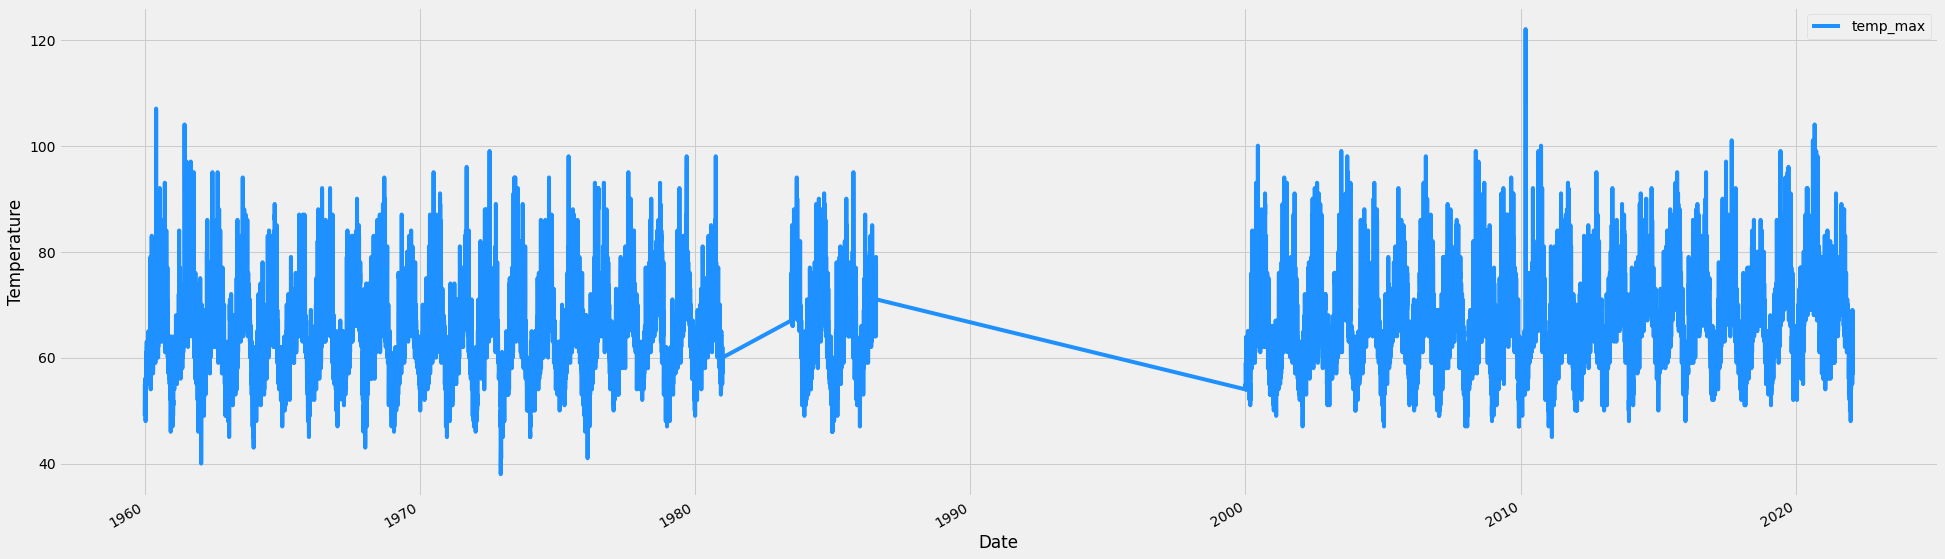

In [73]:
# visualize the data at hand ('temp_max')

plot1 = core_weather.plot(
    kind='line',
    y='temp_max',
    color='dodgerblue',
    xlabel = 'Date',
    ylabel = 'Temperature',
    figsize=(30,10))

In [74]:
# create a target value (next day max temperature)

core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [75]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [76]:
# remove the date where we do not have the next temperature available (the last row)

core_weather = core_weather.iloc[:-1,:]

In [77]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [78]:
# import 'ridge regression model' from scikit-learn; and initialize the model;

from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [79]:
# variables used to predict the target

predictors = ["precip", "temp_max", "temp_min"]

In [80]:
# split the data into training and test set

train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [81]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [82]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0
2022-01-24,0.00,60.0,39.0,57.0
2022-01-25,0.00,57.0,43.0,57.0


In [83]:
# fit the model using the training data

reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [96]:
# generate prediction using the 'predictors' in test data

predictions = reg.predict(test[predictors])

In [97]:
# combined test and prediction data into one dataframe

combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [98]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


In [101]:
# coefficient of regression model

print('Coefficient:',
      reg.coef_)

Coefficient: [-2.20730384  0.72113834  0.17969047]


In [102]:
# calculate mean squared error (MSE)

from sklearn.metrics import mean_squared_error

In [103]:
print('Mean Squared Error:',
      mean_squared_error(test["target"], predictions))

Mean Squared Error: 20.56066854811876


In [104]:
# calculating Mean Absolute Error

print('Mean Absolute Error:',
      np.mean(np.abs(combined['predictions']-combined['actual'])).round(2),
      '(' + str(np.mean((np.abs(((combined['predictions']-combined['actual'])/combined['actual']))*100)).round()) + '%)')

Mean Absolute Error: 3.41 (5.0%)


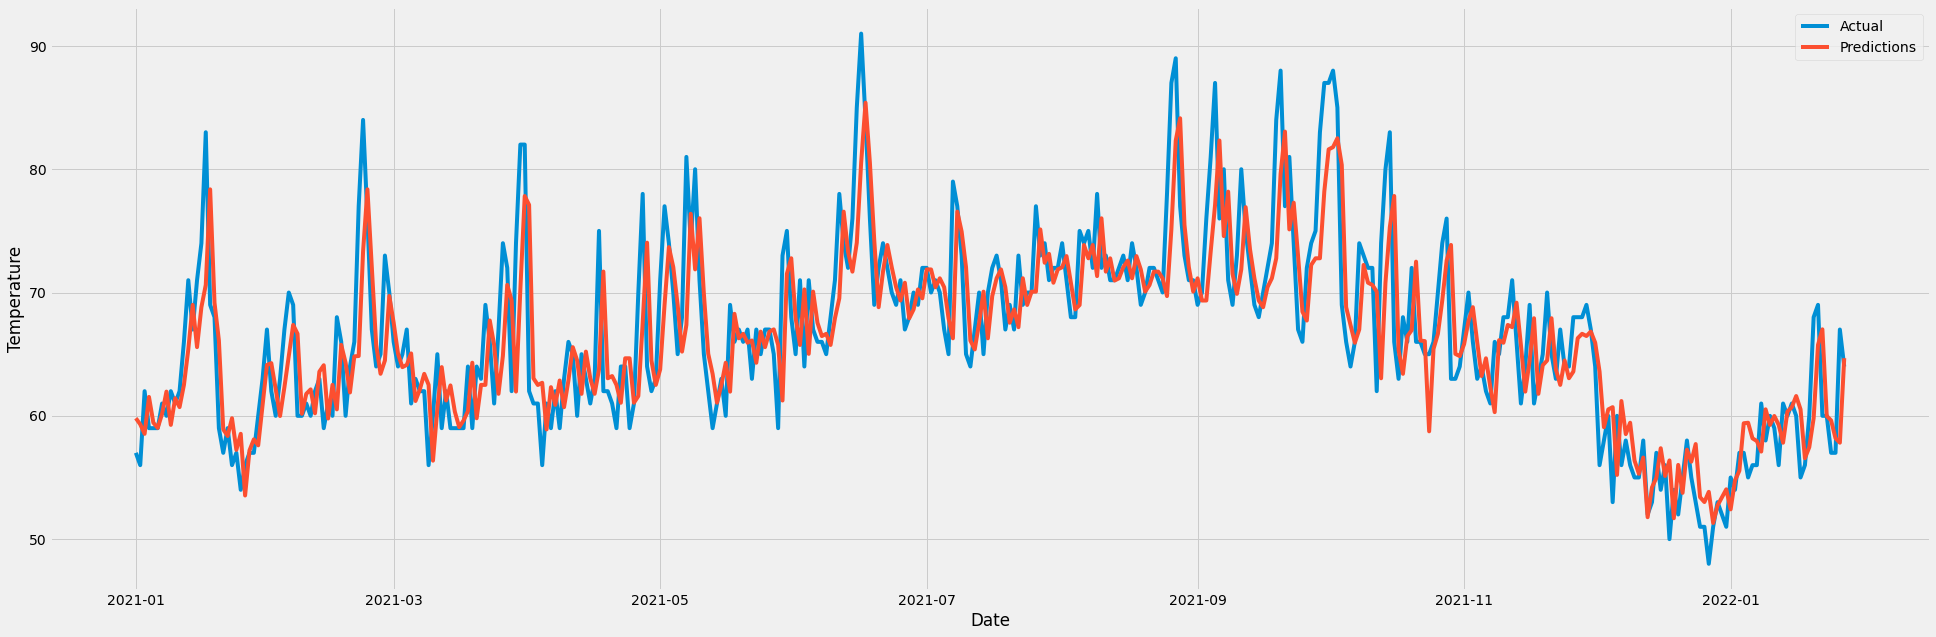

In [119]:
# plot the forecasted data


fig2, plot2 = plt.subplots(figsize=(30,10))
plot2.plot(combined.index, combined['actual'], label = "Actual")
plot2.plot(combined.index, combined['predictions'], label = "Predictions")

plot2.set_xlabel('Date')
plot2.set_ylabel('Temperature')

plt.legend()
plt.show()


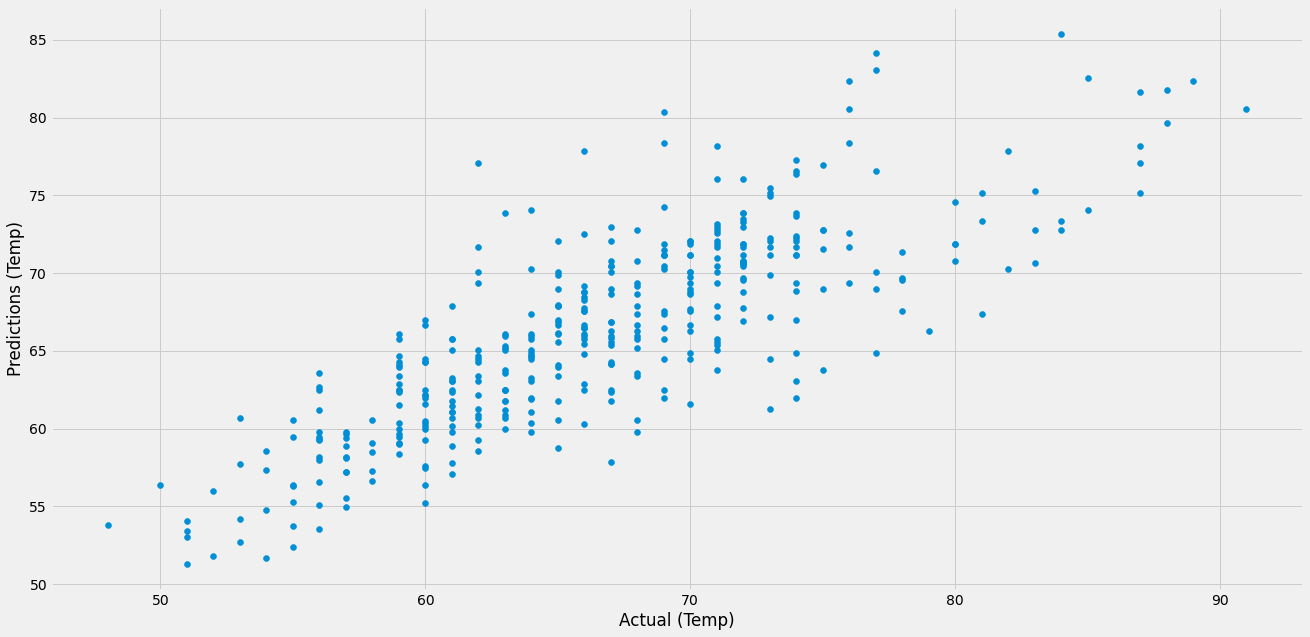

In [124]:
# visualizing the differences between actual and predicted values

plt.figure(figsize=(20, 10))
plt.scatter(combined['actual'], combined['predictions'])
plt.xlabel("Actual (Temp)")
plt.ylabel("Predictions (Temp)")
plt.show()

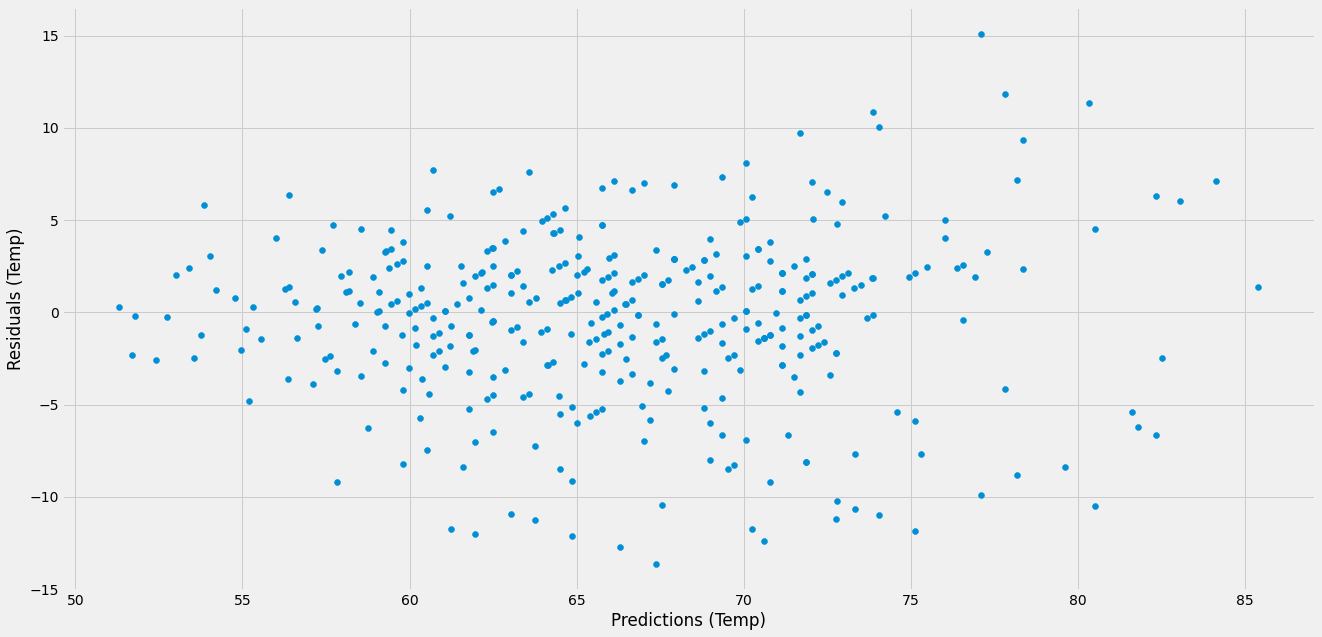

In [125]:
# inspecting the residuals

plt.figure(figsize=(20, 10))
plt.scatter(combined['predictions'],combined['predictions']-combined['actual'])
plt.xlabel("Predictions (Temp)")
plt.ylabel("Residuals (Temp)")
plt.show()

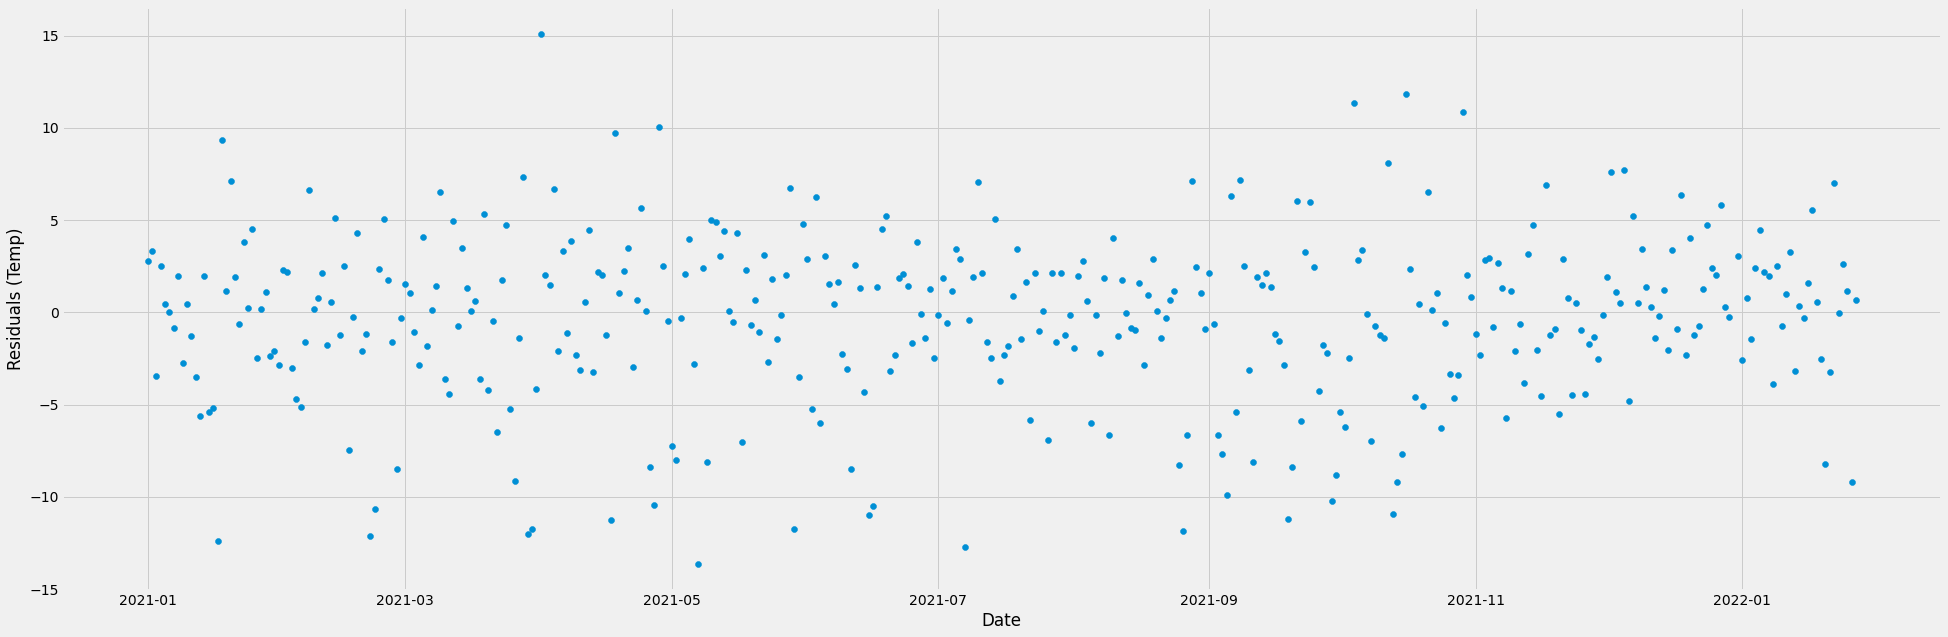

In [127]:
# inspecting the residuals

plt.figure(figsize=(30, 10))
plt.scatter(combined.index,combined['predictions']-combined['actual'])
plt.xlabel("Date")
plt.ylabel("Residuals (Temp)")
plt.show()